<a href="https://www.kaggle.com/code/sevdanuropur/k-means?scriptVersionId=168602739" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# CUSTOMER SEGMENTATION with K-MEANS 

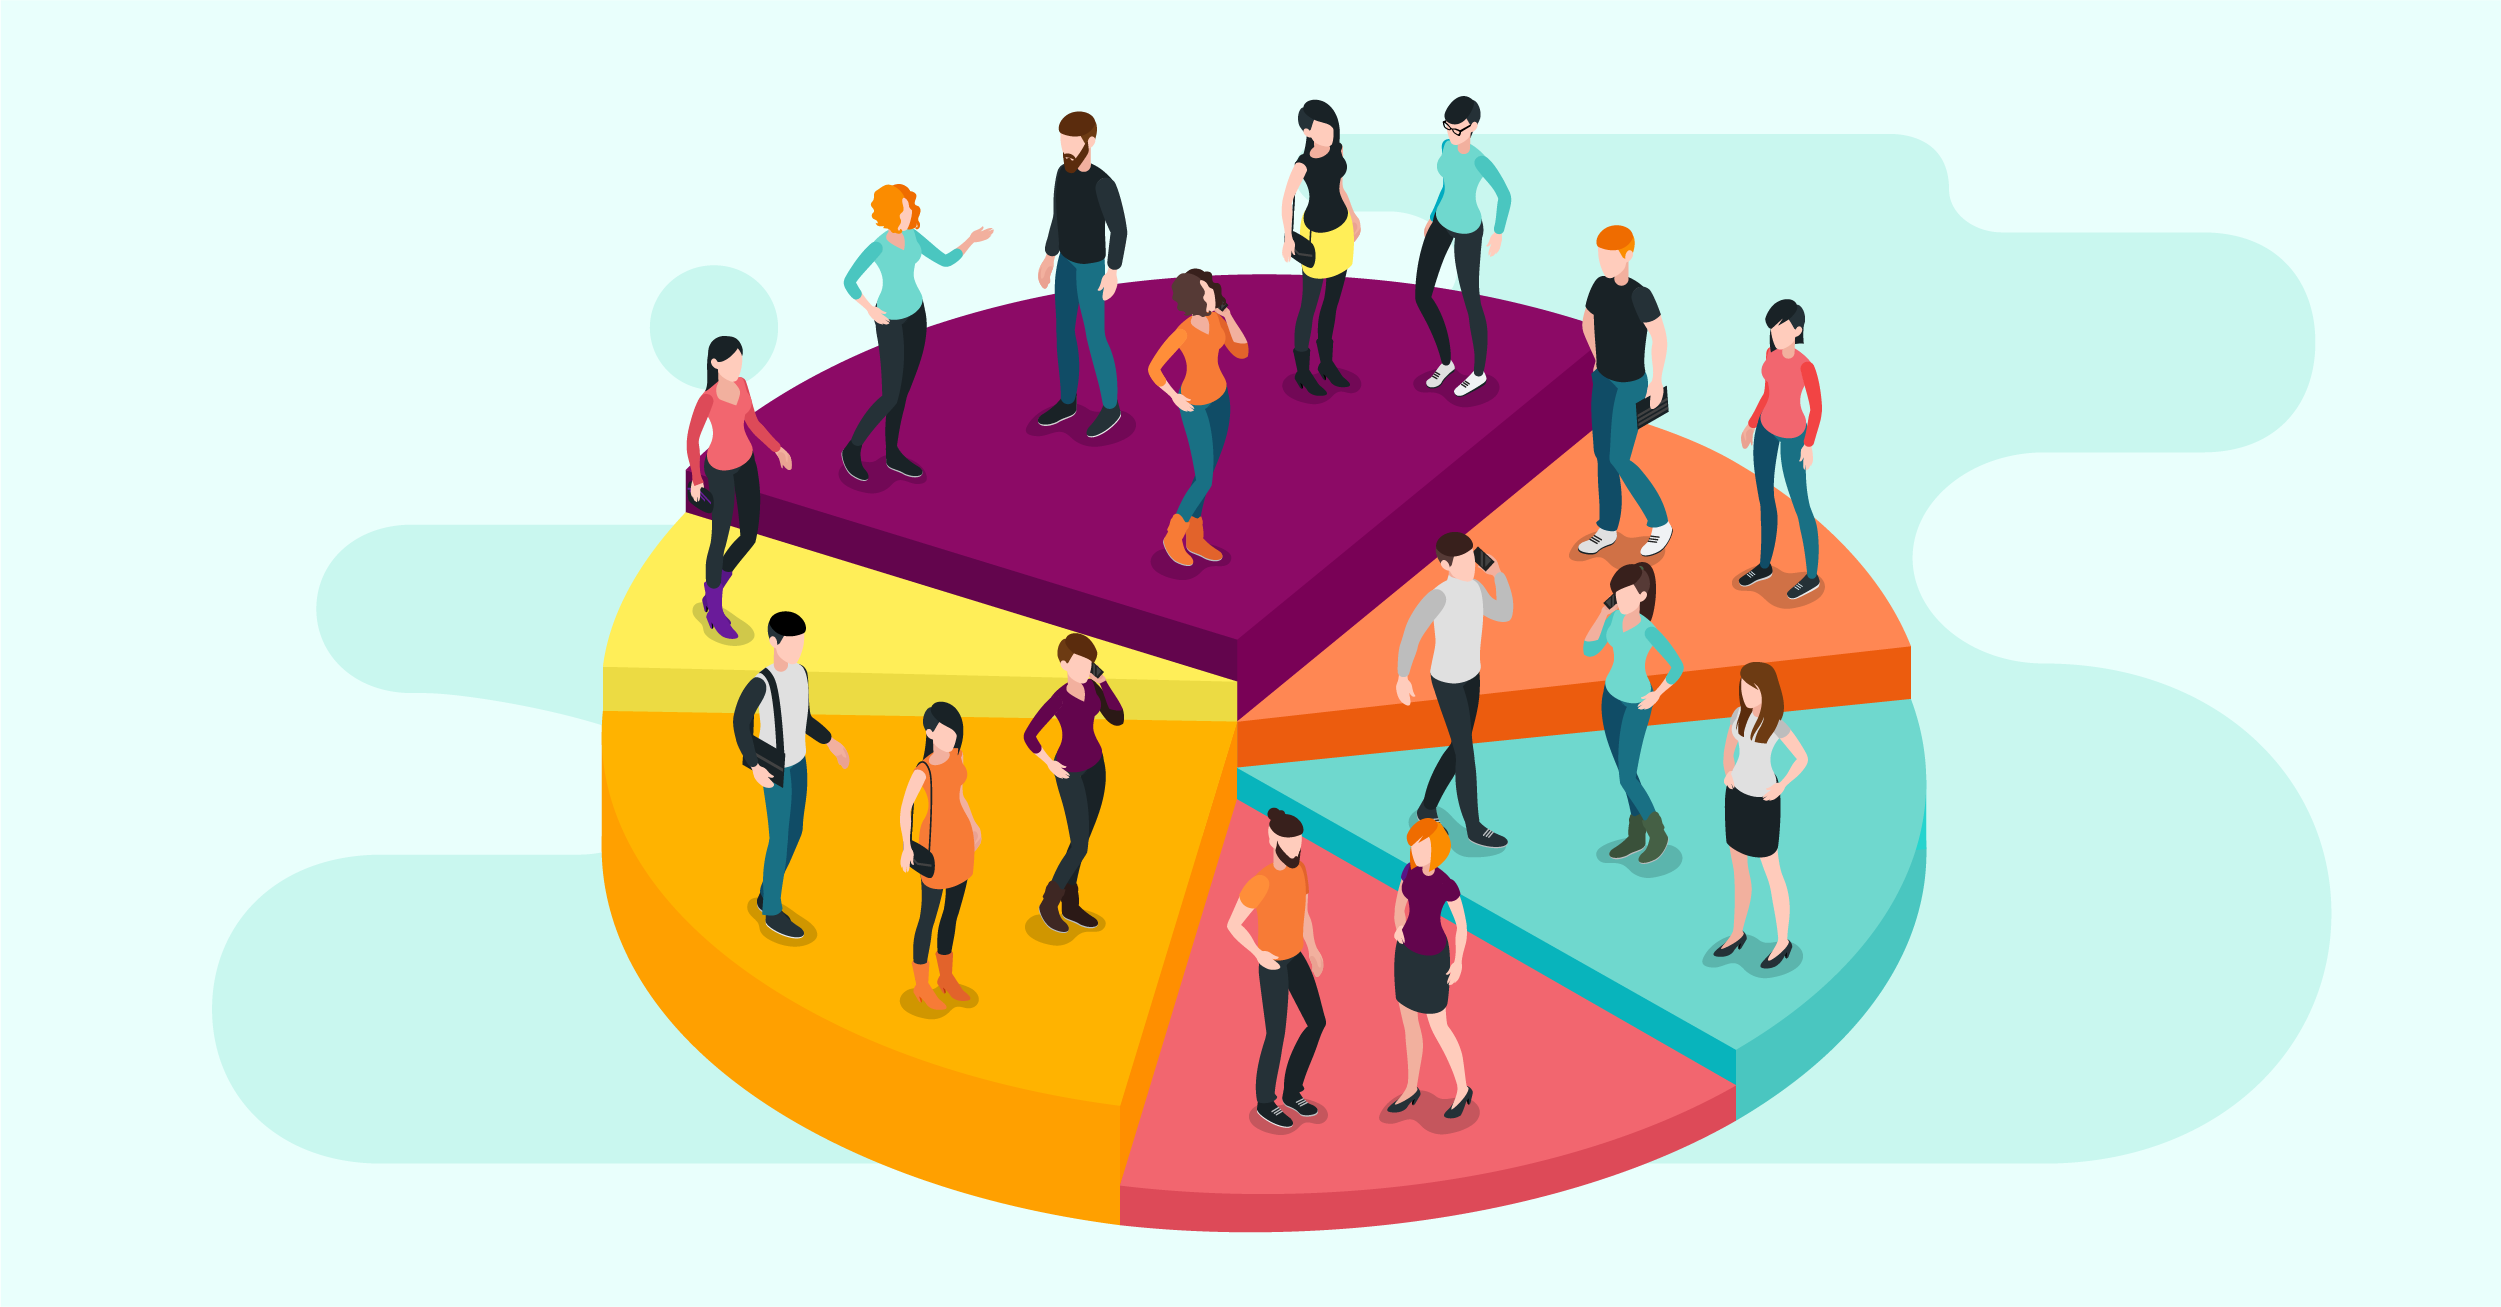

# CONTENTS
* K-MEANS 
* About Dataset
* IMPORT LIBRARIES
* LOAD DATASET
* Aim of the Project
* Customer Segmentation with K-Means
* Customer Segmentation with Hierarchical Clustering


# K-MEANS 

K-Means is a clustering algorithm. It is used to group data points into a specified number of clusters. The algorithm uses an iterative process to partition the data points into clusters. Initially, k centroids (cluster centers) are randomly selected, and each data point is assigned to the nearest centroid. Then, an average calculation is made for each data point with respect to the assigned centroids, and these new average points are designated as the new centroids. This process is repeated until there are no changes in the centroids or until a certain number of iterations are reached. As a result, data points are assigned to clusters, and each cluster is centered around its centroid. K-Means is used in various applications such as data mining, image processing, and pattern recognition.

# About Dataset

The data set includes OmniChannel (both online and offline shoppers) who made their last purchases from Flo in 2020 - 2021.
It consists of information obtained from the past shopping behavior of customers.

* master_id Unique customer number
* order_channel Which channel of the shopping platform is used (Android, iOS, Desktop, Mobile)
* last_order_channel The channel where the last purchase was made
* first_order_date The date of the customer's first purchase
* last_order_date The customer's last purchase date
* last_order_date_online The last shopping date of the customer on the online platform
* last_order_date_offline The last shopping date of the customer on the offline platform
* order_num_total_ever_online Total number of purchases made by the customer on the online platform
* order_num_total_ever_offline Total number of purchases made by the customer offline
* customer_value_total_ever_offline Total price paid by the customer for offline purchases
* customer_value_total_ever_online Total price paid by the customer for online purchases
* interested_in_categories_12 List of categories the customer has shopped in the last 12 months

# Aim of the Project 

Customers will be divided into segments and marketing strategies specific to these segments will be determined.

# IMPORT LIBRARIRES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler 
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer

from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import cross_val_score, GridSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier 
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest


import warnings
warnings.filterwarnings("ignore")

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

# Load Dataset

In [2]:
df_= pd.read_csv("/kaggle/input/flo-data/flo_data_20k.csv")

In [3]:
df= df_.copy()
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]


In [4]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Unique #####################")
    print(dataframe.nunique())

check_df(df)

##################### Shape #####################
(19945, 12)
##################### Types #####################
master_id                             object
order_channel                         object
last_order_channel                    object
first_order_date                      object
last_order_date                       object
last_order_date_online                object
last_order_date_offline               object
order_num_total_ever_online          float64
order_num_total_ever_offline         float64
customer_value_total_ever_offline    float64
customer_value_total_ever_online     float64
interested_in_categories_12           object
dtype: object
##################### NA #####################
master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_tota

In [5]:
# let's set the datetimes first
for col in df.columns:
    if "date" in col:
        df[col]=pd.to_datetime(df[col])

In [6]:
# tenure: selected date - first arrival date
# recency : selected date - last date

# frequency: how many times it comes

# total paid amount: What is the amount paid to us online + offline 


In [7]:
from datetime import timedelta

selected_date= df["last_order_date"].max()+ timedelta(days=2)
selected_date


Timestamp('2021-06-01 00:00:00')

In [8]:
df["total_value"]=df["customer_value_total_ever_offline"]+df["customer_value_total_ever_online"]
df["frequency"]=df["order_num_total_ever_offline"]+ df["order_num_total_ever_online"]  

In [9]:
df["tenure"]= (selected_date- df["first_order_date"]).dt.days 

df["recency"]= (selected_date- df["last_order_date"]).dt.days

In [10]:
df["frequency"]=df["frequency"].astype("int64")

In [11]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_value,frequency,tenure,recency
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],939.37,5,214,95
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",2013.55,21,1574,105
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",585.32,5,552,186
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",121.97,2,146,135
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],209.98,2,668,86


# Customer Segmentation with K-Means

In [12]:
# these are the selected columns we arre gonna make segmentation according to this column 
df_cluster=df[["total_value","frequency","tenure","recency"]]

In [13]:
# Let's standardize the numeric variables

sc = MinMaxScaler((0, 1))
df_cluster = sc.fit_transform(df_cluster)  # burda numpy arrayine dönüşüyor
df_cluster[0:5]

array([[0.01950257, 0.015     , 0.06841244, 0.25479452],
       [0.04292553, 0.095     , 0.51358429, 0.28219178],
       [0.01178235, 0.015     , 0.17905074, 0.50410959],
       [0.0016788 , 0.        , 0.04615385, 0.36438356],
       [0.0035979 , 0.        , 0.21702128, 0.23013699]])

In [14]:
# let's say that we want a 5 cluster
kmeans_2 = KMeans(n_clusters=5, random_state=17).fit(df_cluster) 
kmeans_2.get_params() 
# these are the default parameters

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 5,
 'n_init': 'warn',
 'random_state': 17,
 'tol': 0.0001,
 'verbose': 0}

In [15]:
kmeans_2.n_clusters

5

In [16]:
print(kmeans_2.cluster_centers_)  # centers
print(kmeans_2.labels_) # fetches cluster labels
print(kmeans_2.inertia_)  # sse, ssr: distances to the nearest cluster

[[0.0272355  0.03766942 0.60912885 0.18793842]
 [0.01113387 0.00926661 0.22472147 0.81626441]
 [0.01608843 0.01439213 0.18918179 0.11136013]
 [0.01298982 0.0111374  0.20848348 0.42648602]
 [0.01851985 0.02562917 0.64464481 0.70651501]]
[2 0 3 ... 2 3 1]
380.4847346013211


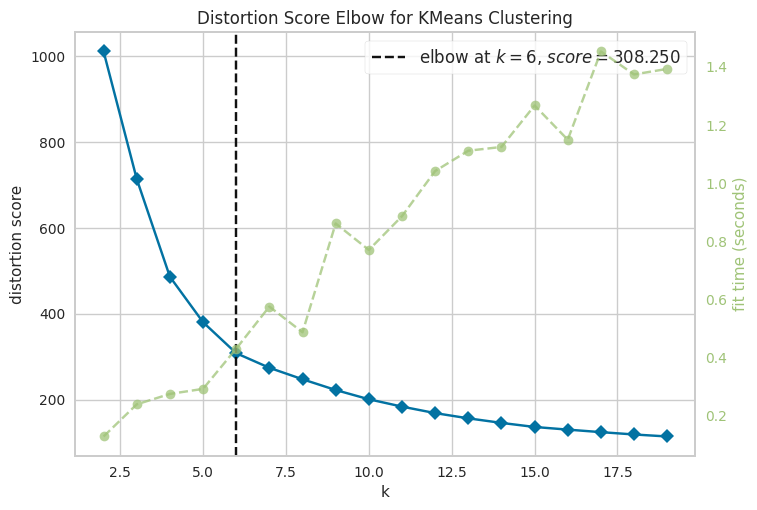

6

In [17]:
# optimum value seems to be 6
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(df_cluster)
elbow.show()

elbow.elbow_value_

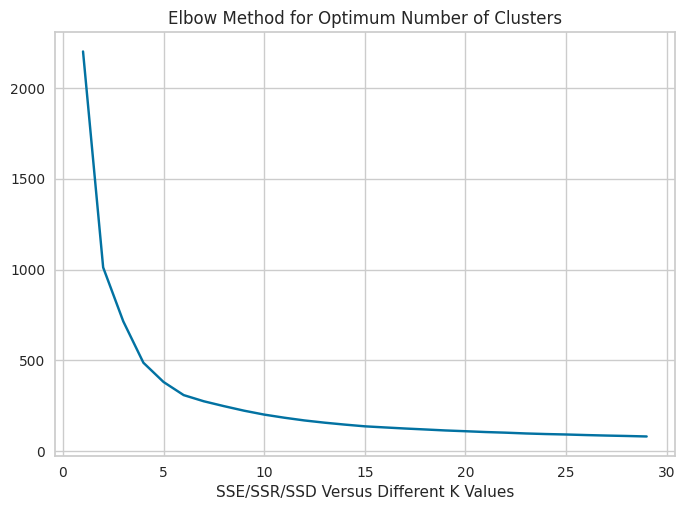

In [18]:
kmeans = KMeans()
ssd = []
K = range(1, 30)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(df_cluster)
    ssd.append(kmeans.inertia_)



plt.plot(K, ssd, "bx-")
plt.xlabel("SSE/SSR/SSD Versus Different K Values")
plt.title("Elbow Method for Optimum Number of Clusters")
plt.show()

In [19]:
kmeans = KMeans(n_clusters=elbow.elbow_value_,random_state=17).fit(df_cluster) 

print("total cluster",kmeans.n_clusters)
print("cluster centers",kmeans.cluster_centers_ )
print("cluster labels", kmeans.labels_) 

total cluster 6
cluster centers [[0.0127412  0.01064041 0.2167357  0.54543524]
 [0.01100253 0.00906853 0.22923107 0.86902513]
 [0.02746142 0.03805273 0.613432   0.1901951 ]
 [0.01653961 0.01480915 0.18885466 0.07931912]
 [0.01865211 0.02593467 0.65423254 0.71151098]
 [0.01350185 0.01208261 0.19927235 0.29616592]]
cluster labels [5 2 0 ... 3 5 1]


In [20]:
clusters_kmeans = kmeans.labels_

In [21]:
df["kmeans_cluster_no"] = clusters_kmeans

In [22]:
df["kmeans_cluster_no"]= df["kmeans_cluster_no"] +1

In [23]:
df[df["kmeans_cluster_no"]==1].head(3)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_value,frequency,tenure,recency,kmeans_cluster_no
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",585.32,5,552,186,1
6,c445e4ee-6242-11ea-9d1a-000d3a38a36f,Android App,Android App,2020-03-04,2020-10-18,2020-10-18,2020-03-04,3.0,1.0,59.99,315.94,[AKTIFSPOR],375.93,4,454,226,1
9,1143f032-440d-11ea-8b43-000d3a38a36f,Mobile,Mobile,2019-07-30,2020-10-04,2020-10-04,2019-07-30,1.0,1.0,69.98,95.98,"[KADIN, AKTIFSPOR]",165.96,2,672,240,1


In [24]:
df.groupby("kmeans_cluster_no").agg({"total_value":"mean",
                                     "frequency":"mean",
                                     "tenure":"mean",
                                      "recency":"mean"})

,total_value,frequency,tenure,recency
kmeans_cluster_no,,,,
1,629.402144,4.126814,666.957983,201.231729
2,549.812795,3.814348,705.484430,319.240047
3,1304.603389,9.613174,1878.625749,71.420958
4,802.848810,4.957869,581.761582,31.029056
5,900.367960,7.186935,2003.680402,261.701508
6,664.104711,4.418308,614.162952,110.307726


In [25]:
df_deneme=df[["total_value","frequency","tenure","recency","kmeans_cluster_no"]]

df_deneme.groupby("kmeans_cluster_no").agg(["count","mean","median"])

total_value                       frequency            \
                        count         mean   median     count      mean   
kmeans_cluster_no                                                         
1                        3927   629.402144  485.930      3927  4.126814   
2                        2537   549.812795  442.970      2537  3.814348   
3                        1670  1304.603389  905.185      1670  9.613174   
4                        6195   802.848810  598.370      6195  4.957869   
5                         995   900.367960  660.690       995  7.186935   
6                        4621   664.104711  504.230      4621  4.418308   

                         tenure                      recency              \
                  median  count         mean  median   count        mean   
kmeans_cluster_no                                                          
1                    3.0   3927   666.957983   633.0    3927  201.231729   
2                    3.0   2537   705.484430   653.0    2537  319.240047   
3                    7.0   1670  1878.625749  1804.0    1670   71.420958   
4                    4.0   6195   581.761582   594.0    6195   31.029056   
5                    5.0    995  2003.680402  1981.0     995  261.701508   
6                    4.0   4621   614.162952   615.0    4621  110.307726   

                          
                  median  
kmeans_cluster_no         
1                  197.0  
2                  323.0  
3                   70.0  
4                   28.0  
5                  258.0  
6                  109.0

We can use scotter plot to look at the relationship between two variables. For example, I want to examine the customer's age and how many days ago he/she last shopped. I can use scotter plot to look at the relationship between two numerical variables.


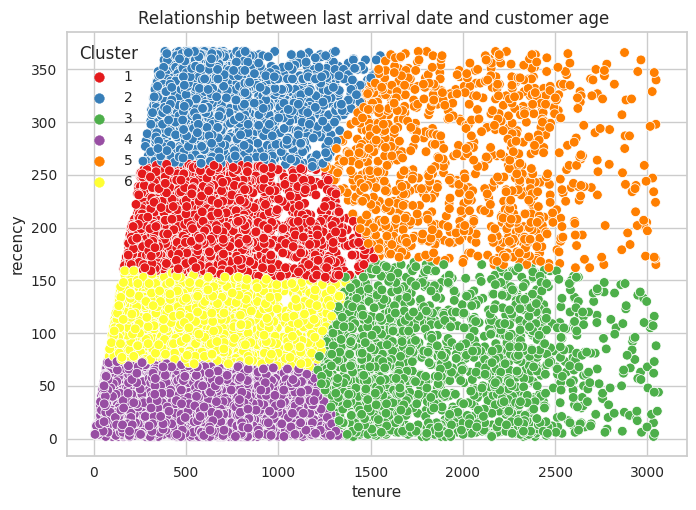

In [26]:
sns.scatterplot(data=df, x='tenure', y='recency', hue='kmeans_cluster_no', palette='Set1')
plt.xlabel('tenure')
plt.ylabel('recency')
plt.title('Relationship between last arrival date and customer age ')
plt.legend(title='Cluster')
plt.show()

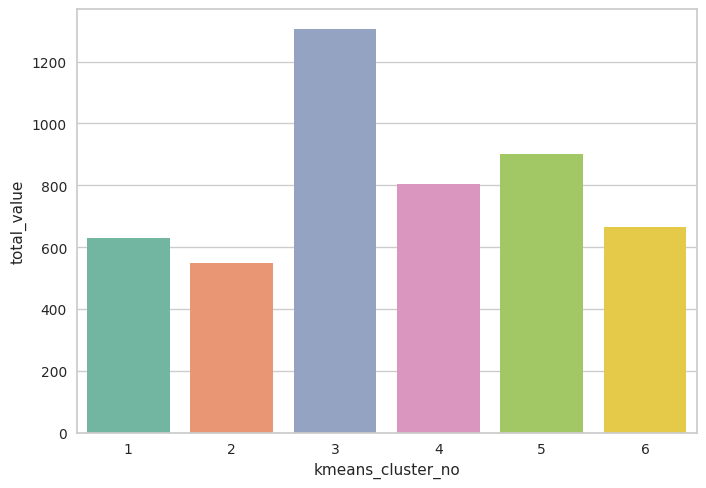

In [27]:
sns.barplot(data=df, x='kmeans_cluster_no', y='total_value',  ci=None, palette='Set2')
plt.show()

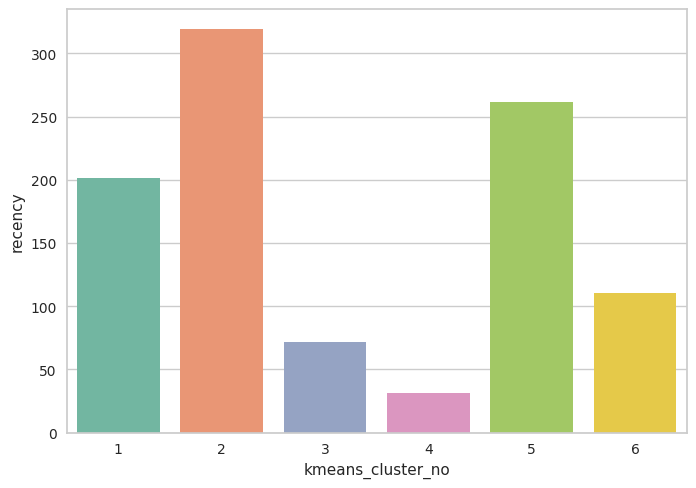

In [28]:
sns.barplot(data=df, x='kmeans_cluster_no', y='recency',  ci=None, palette='Set2')
plt.show()

### A/B Anova Testing
Steps
* first we will establish the hypothesis
* H0: M1 = M2=M3 (no difference)
* H1: M1 != M2 !=M3 ( there is a difference)
* Then we will move on to the assumption checking phase.
* If normality assumption + variance assumption is met, we can test with paramedric f_oneway
* If the normality assumption is not met, we will directly apply the kruskal test (non-parametric test)

In [29]:
# 1. Establish Hypothesis:
# Is there a statistical difference between label types ?
# Ho: M1=M2 =M3 (no difference between them)
# H1= M1!=M2 != M3 (there is a difference between them) 


# 1. Normality

# H0: Normal distribution assumption is met.
# H1:..not provided.

# HO RED if p-value < 0.05.
# If p-value is not < 0.05 H0 CANNOT BE REJECTED.


In [30]:
for group in list(df["kmeans_cluster_no"].unique()):
    pvalue = shapiro(df.loc[df["kmeans_cluster_no"] == group, "total_value"])[1]
    print(group, 'p-value: %.4f' % pvalue)

# there is no normal distribution 

6 p-value: 0.0000
3 p-value: 0.0000
1 p-value: 0.0000
2 p-value: 0.0000
4 p-value: 0.0000
5 p-value: 0.0000


In [31]:
print(kruskal(df.loc[df["kmeans_cluster_no"] == 1, "total_value"],
                     df.loc[df["kmeans_cluster_no"] == 2, "total_value"],
                     df.loc[df["kmeans_cluster_no"] == 3, "total_value"],
                     df.loc[df["kmeans_cluster_no"] == 4, "total_value"],
                     df.loc[df["kmeans_cluster_no"] == 5, "total_value"],
                     df.loc[df["kmeans_cluster_no"] == 6, "total_value"])[1])

# h0 is rejected because this number is less than 0.05 this suggests that there are statistically significant differences between the clustering types

1.7309365430128065e-251


In [32]:
# Let's use the Mann-Whitney U test to determine differences between groups
from scipy.stats import mannwhitneyu

clusters = [1, 2, 3, 4, 5, 6]  
significant_pairs = [] 

for i in range(len(clusters)):
    for j in range(i+1, len(clusters)):
        cluster1 = df.loc[df["kmeans_cluster_no"] == clusters[i], "total_value"]
        cluster2 = df.loc[df["kmeans_cluster_no"] == clusters[j], "total_value"]
        stat, p_value = mannwhitneyu(cluster1, cluster2)
        if p_value < 0.05: 
            significant_pairs.append((clusters[i], clusters[j]))
            print(f"Cluster {clusters[i]} ile Cluster {clusters[j]} There is a significant difference between them. ")


if not significant_pairs:
    print("No statistically significant difference was found.")


Cluster 1 ile Cluster 2 There is a significant difference between them. 
Cluster 1 ile Cluster 3 There is a significant difference between them. 
Cluster 1 ile Cluster 4 There is a significant difference between them. 
Cluster 1 ile Cluster 5 There is a significant difference between them. 
Cluster 1 ile Cluster 6 There is a significant difference between them. 
Cluster 2 ile Cluster 3 There is a significant difference between them. 
Cluster 2 ile Cluster 4 There is a significant difference between them. 
Cluster 2 ile Cluster 5 There is a significant difference between them. 
Cluster 2 ile Cluster 6 There is a significant difference between them. 
Cluster 3 ile Cluster 4 There is a significant difference between them. 
Cluster 3 ile Cluster 5 There is a significant difference between them. 
Cluster 3 ile Cluster 6 There is a significant difference between them. 
Cluster 4 ile Cluster 5 There is a significant difference between them. 
Cluster 4 ile Cluster 6 There is a significant diff

## Customer Segmentation with Hierarchical Clustering

In [33]:
df_cluster

array([[0.01950257, 0.015     , 0.06841244, 0.25479452],
       [0.04292553, 0.095     , 0.51358429, 0.28219178],
       [0.01178235, 0.015     , 0.17905074, 0.50410959],
       ...,
       [0.01282073, 0.005     , 0.20425532, 0.01643836],
       [0.02103767, 0.02      , 0.25924714, 0.29041096],
       [0.00473156, 0.        , 0.20687398, 0.98082192]])

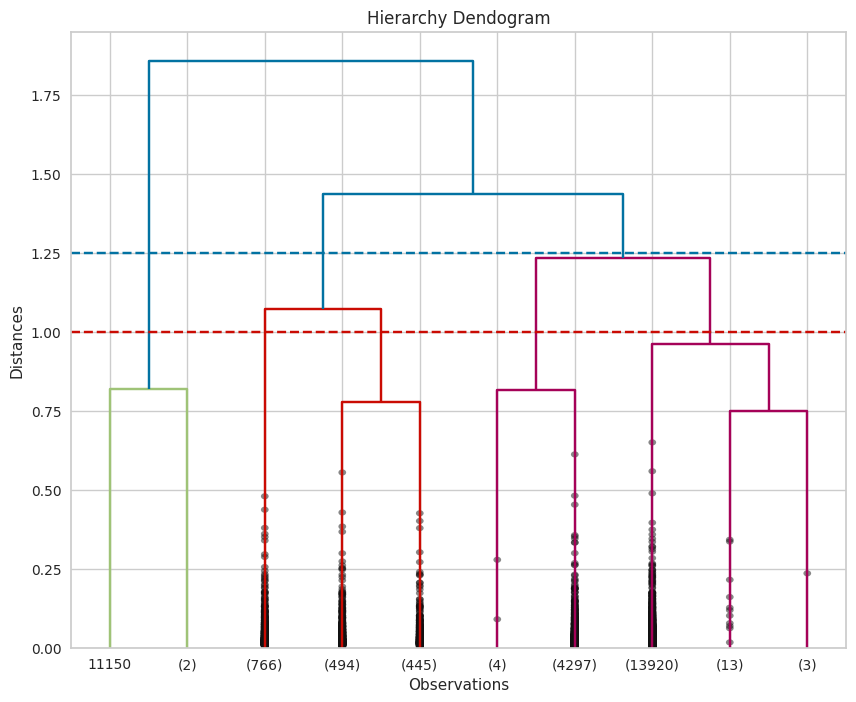

In [34]:
hc_complete = linkage(df_cluster, 'complete')

plt.figure(figsize=(10, 8))
plt.title("Hierarchy Dendogram")
plt.xlabel("Observations")
plt.ylabel("Distances")
dendrogram(hc_complete,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10)

plt.axhline(y=1, color='r', linestyle='--')
plt.axhline(y=1.25, color='b', linestyle='--')
plt.show()

In [35]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, linkage="average")

clusters = cluster.fit_predict(df_cluster)

In [36]:
df["hi_cluster_no"] = clusters

In [37]:
df["hi_cluster_no"] = df["hi_cluster_no"] + 1

In [38]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_value,frequency,tenure,recency,kmeans_cluster_no,hi_cluster_no
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],939.37,5,214,95,6,1
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",2013.55,21,1574,105,3,1
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",585.32,5,552,186,1,1
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",121.97,2,146,135,6,1
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],209.98,2,668,86,6,1


In [39]:
df[df["hi_cluster_no"]!=df["kmeans_cluster_no"]].head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_value,frequency,tenure,recency,kmeans_cluster_no,hi_cluster_no
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],939.37,5,214,95,6,1
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",2013.55,21,1574,105,3,1
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",121.97,2,146,135,6,1
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],209.98,2,668,86,6,1
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,Desktop,Offline,2018-11-18,2021-03-13,2018-11-18,2021-03-13,1.0,2.0,150.87,49.99,[KADIN],200.86,3,926,80,6,1


In [40]:
df_hieracy=df[["total_value","frequency","tenure","recency","hi_cluster_no"]]

df_hieracy.groupby("hi_cluster_no").agg(["count","mean","median"])

total_value                         frequency              \
                    count          mean    median     count        mean   
hi_cluster_no                                                             
1                   19939    742.399811    544.96     19939    5.001304   
2                       2  23100.170000  23100.17         2  106.500000   
3                       3  29584.013333  31227.41         3   27.666667   
4                       1  45905.100000  45905.10         1  202.000000   

                     tenure                      recency                     
              median  count         mean  median   count        mean median  
hi_cluster_no                                                                
1                4.0  19939   801.058278   651.0   19939  134.486233  111.0  
2              106.5      2  2858.500000  2858.5       2   18.500000   18.5  
3               11.0      3   392.333333    92.0       3   60.666667   49.0  
4              202.0      1  2790.000000  2790.0       1   32.000000   32.0

# Conclusion 

Hello again! It was really enjoyable for me to complete this work. I tried to concretize my analyzes on K-MEANS with this data set. If you liked the work I did on this subject, I am waiting for your comments. If you have any bugs or improvement suggestions, please share. Also, if you have suggestions or topics you would like to include in my future projects, let me know. I look forward to your contributions and thank you! 🚀📈